<a href="https://colab.research.google.com/github/Ymin-2/ESAA/blob/main/YB_1114_%EC%97%B0%EC%8A%B5%EB%AC%B8%EC%A0%9C_%ED%9A%8C%EA%B7%802.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. 규제 선형 회귀 모델/ 회귀 트리**
- 릿지 회귀모델 및 회귀 트리를 이용하여 전복의 나이를 예측해 보세요.

- 전복의 ‘성별’, ‘키’, ‘지름’, ‘높이’, ‘전체무게’, ‘몸통무게’, ‘내장무게’, ‘껍질무게’를 이용해 ‘껍질의 고리수’를 예측한 뒤, **예측된 ‘껍질의 고리수’에 1.5를 더하면 전복의 나이**가 됩니다.

In [2]:
# 기본 모듈 불러오기
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings(action='ignore')

### 1) 데이터 불러오기 및 데이터 선택

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# 데이터 로드
data = pd.read_csv("/content/drive/MyDrive/ESAA/exercises/abalone.csv")

# 성별 M은 Male, F는 Female, I는 Infant 이므로 따로 열 만들기
for label in "MFI":
    data[label] = data["Sex"] == label
data.drop('Sex', axis=1, inplace=True)

# X,y 데이터 선택
y = data.Rings.values
data.drop('Rings', axis=1, inplace=True)

X = data.values.astype(float)

## 2) train/test 분리
: 테스트 셋과 데이터 셋을 7:3 비율로 분리하세요.

In [6]:
# 필요한 모듈 불러오기
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

In [7]:
# train과 test set 분리 (train:test = 7:3 비율로)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## 3) 릿지 모델을 이용한 모델링
: 릿지 모델을 이용하여 전복의 나이를 예측해 보고 결과를 평가해 보세요.

 3-1) 릿지모델 생성, 교차검증, 평가에 필요한 모듈을 불러오세요.

In [8]:
#필요한 모듈 불러오기
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

3-2) 릿지 모델을 생성하고 훈련하여 MSE와 RMSE를 구하세요. 릿지 모델 생성 시  alpha는 0.3으로 설정합니다. (교차 검증 하지 않습니다.)

In [9]:
#릿지모델 생성 및 훈련
ridge = Ridge(alpha=0.3)
ridge.fit(X_train, y_train)

#예측값 구하기
y_pred_rings = ridge.predict(X_test)

#구한 예측값을 활용해 최종적으로 전복의 나이 예측
y_pred_age = y_pred_rings + 1.5

#MSE와 RMSE구하기
mse = mean_squared_error(y_test + 1.5, y_pred_age)
rmse = np.sqrt(mse)
mse, rmse

(4.772148639987027, np.float64(2.1845248087369087))

3-3) 릿지 모델에서 회귀 계수 값을 구해 알 수 있는 점을 작성하시오. (각 컬럼의 정보는 data.colums 참고)

In [10]:
data.columns

Index(['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'M', 'F', 'I'],
      dtype='object')

In [16]:
ridge.coef_

array([  2.28664286,   7.95094214,   8.8864059 ,   8.62557654,
       -20.04063145,  -8.64488762,   9.36081101,   0.30926761,
         0.22377145,  -0.53303906])

- 릿지 모델의 회귀 계수: 각 입력 변수가 예측값에 얼마나 기여하는지를 숫자로 보여주는 값
- 전복 나이는 크기·무게(특히 지름, 높이, 전체무게, 껍질무게)가 결정적
- 내부 무게는 음수: 피처 간 상관성 때문에 조정됨
- 성별 영향은 거의 없음

3-3) 교차검증을 이용하여 0, 0.1, 1, 10, 100 중  모델 성능이 가장 좋게 나오는 (rmse가 최소가 되는) alpha를 구하세요.

In [12]:
# 주어진 alpha
alphas=[0, 0.1, 1, 10, 100]

In [13]:
#alphas list 값을 반복하면서 alpha에 따른 평균 rmse를 구함
  #cross_val_score를 이용해 5 폴드의 평균 RMSE를 계산

rmse_list = []

for a in alphas:
    model = Ridge(alpha=a)
    scores = cross_val_score(model, X_train, y_train,
                             scoring='neg_mean_squared_error',
                             cv=5)
    rmse = np.sqrt(-scores.mean())
    rmse_list.append(rmse)

rmse_list

[np.float64(2.247626192450068),
 np.float64(2.2325057051330144),
 np.float64(2.2183215150156452),
 np.float64(2.3681790282573507),
 np.float64(2.639586263731927)]

## 4) XGBRegressor을 이용한 모델링
: XGBRegressor 모델을 이용하여 전복의 나이를 예측해 보고 결과를 평가해 보세요.

4-1) XGBRegressor 훈련, 평가에 필요한 모듈을 불러오세요.

In [14]:
# 필요한 모듈 임포트
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

4-2) XGBregressor 모델을 생성하고 훈련하여 MSE와 RMSE를 구하세요.

In [15]:
#모델 생성 및 훈련
xgb = XGBRegressor(random_state=42)
xgb.fit(X_train, y_train)

#예측값 구하기
y_pred_rings = xgb.predict(X_test)

#구한 예측값을 활용해 최종적으로 전복의 나이 예측
y_pred_age = y_pred_rings + 1.5

#MSE와 RMSE 구하기
mse = mean_squared_error(y_test + 1.5, y_pred_age)
rmse = np.sqrt(mse)

mse, rmse

(5.50596895404192, np.float64(2.3464801201037098))

4-3) 생성한 모델의 피처 중요도를 시각화해보세요.

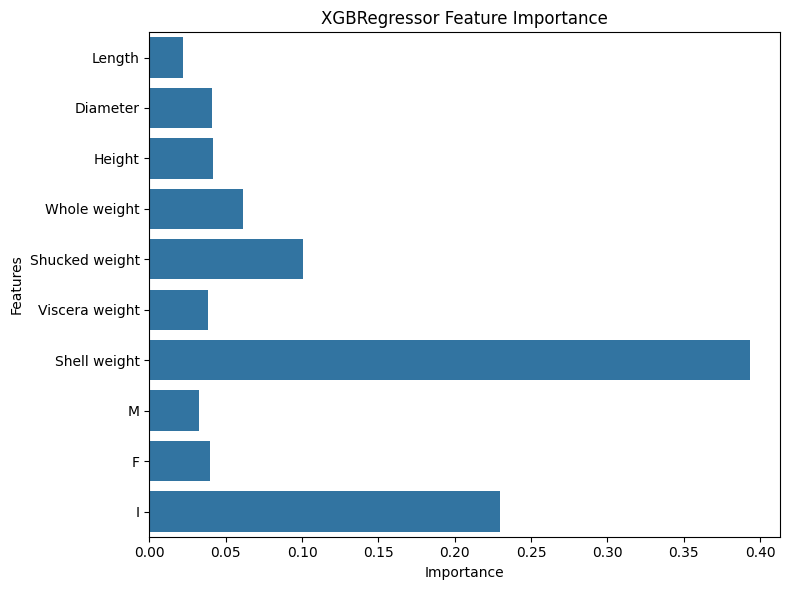

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# 피처 이름
features = data.columns.tolist()

# 중요도
importances = xgb.feature_importances_

# 시각화
plt.figure(figsize=(8,6))
sns.barplot(x=importances, y=features)
plt.xlabel("Importance")
plt.ylabel("Features")
plt.title("XGBRegressor Feature Importance")
plt.tight_layout()
plt.show()

---

# **2. 로지스틱 회귀분석**
load_wine() 함수를 이용하여 와인 데이터를 다항분류하는 로지스틱 회귀모델을 생성하세요.

In [19]:
# 필요한 모듈 불러오기
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

## 1) 데이터 불러오기 및 변수 선택

In [20]:
wine = load_wine()

wine_x = wine.data # x변수
wine_y = wine.target # y변수

## 2) train/test 셋 분리

In [21]:
x_train, x_test, y_train, y_test = train_test_split(wine_x, wine_y, test_size=0.3, random_state=123)

x_train.shape
y_train.shape

(124,)

## 3) 로지스틱 회귀모델을 이용한 모델링

3-1) 로지스틱 회귀모델을 생성하여 훈련하세요.

In [22]:
log_reg = LogisticRegression(max_iter=1000, multi_class='multinomial')
log_reg.fit(x_train, y_train)

LogisticRegression(max_iter=1000, multi_class='multinomial')

3-2) 회귀 모델의 기울기와 절편을 구하세요.

In [23]:
#기울기
log_reg.coef_

array([[-4.96429625e-01,  5.36751015e-01,  6.77876404e-01,
        -2.91296922e-01,  7.42132329e-04,  1.35721997e-01,
         1.01362941e+00,  1.14729615e-01, -9.07912129e-02,
         4.63017606e-02, -2.24580579e-01,  5.37034763e-01,
         9.21897462e-03],
       [ 6.42193077e-01, -8.67206745e-01, -7.17360532e-01,
         1.92521278e-01, -2.48723088e-02,  3.95774753e-01,
        -9.28541506e-02,  2.09352651e-01,  5.88471149e-01,
        -7.45552918e-01,  7.51225052e-01,  1.55946921e-01,
        -7.86336524e-03],
       [-1.45763452e-01,  3.30455730e-01,  3.94841275e-02,
         9.87756432e-02,  2.41301765e-02, -5.31496750e-01,
        -9.20775255e-01, -3.24082266e-01, -4.97679936e-01,
         6.99251158e-01, -5.26644473e-01, -6.92981685e-01,
        -1.35560939e-03]])

In [24]:
#절편
log_reg.intercept_

array([-1.07156036,  1.44899644, -0.37743608])

3-3) 모델의 정확도를 구하세요.

In [26]:
#모델의 예측값 구하기
y_pred = log_reg.predict(x_test)

#모델의 정확도 구하기
accuracy = metrics.accuracy_score(y_test, y_pred)
accuracy

0.9259259259259259